<a href="https://colab.research.google.com/github/Ali05R/Tarea-/blob/main/Base_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

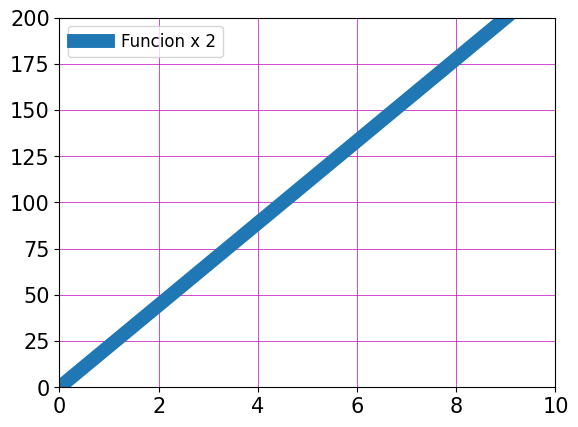

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.linspace(0, 200, 10)

plt.grid(color = "m", linestyle = "-", linewidth = 0.5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlim(0, 10)
plt.ylim(0, 200)

plt.plot(ypoints, linewidth =10)

plt.legend(["Funcion x 2"], loc="upper left", fontsize=12)

plt.savefig("Funcion x 2.png", dpi=300, bbox_inches="tight")
plt.show()

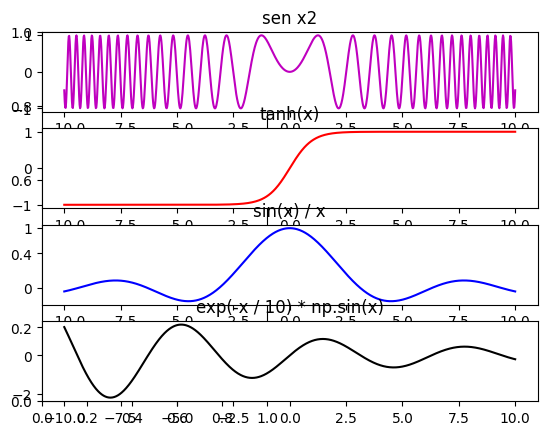

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10, 10, 1000)

#plot 1:
plt.subplot(1, 2, 1)
y1 = np.sin(x**2)
plt.subplot(4, 1, 1)
plt.plot(x, y1, color = "m")
plt.title("sen x2")


#plot 2:
plt.subplot(1, 2, 1)
y2 = np.tanh(x)
plt.subplot(4, 1, 2)
plt.plot(x, y2, color = "r")
plt.title("tanh(x)")

#plot 3:
plt.subplot(1, 2, 1)
y3 = np.sinc(x / np.pi)
plt.subplot(4, 1, 3)
plt.plot(x, y3, color = "blue")
plt.title("sin(x) / x")

#plot 4:
plt.subplot(1, 2, 1)
y4 = np.exp(-x / 10) * np.sin(x)
plt.subplot(4, 1, 4)
plt.plot(x, y4, color = "k")
plt.title("exp(-x / 10) * np.sin(x)")


plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[file_name]))
print(df.head())

Saving ebola_2014_2016_clean.csv to ebola_2014_2016_clean (1).csv
        Country        Date  No. of confirmed cases  No. of confirmed deaths  \
0        Guinea  29/08/2014                     482                    287.0   
1       Nigeria  29/08/2014                      15                      6.0   
2  Sierra Leone  29/08/2014                     935                    380.0   
3       Liberia  29/08/2014                     322                    225.0   
4        Guinea  05/09/2014                     604                    362.0   

   Male Cases  Female Cases    Boys   Girls  Adult Male  Adult Female  \
0       289.2         192.8   86.76   57.84      173.52        115.68   
1         9.0           6.0    2.70    1.80        5.40          3.60   
2       561.0         374.0  168.30  112.20      336.60        224.40   
3       193.2         128.8   57.96   38.64      115.92         77.28   
4       362.4         241.6  108.72   72.48      217.44        144.96   

   Old Male  O

In [ ]:
df["Country"].isin(["Mexico"]).sum()

0

In [ ]:
conteo = df.groupby("Country").size().reset_index(name="conteo")
conteo.sort_values("conteo", ascending=False)
print(conteo)

                    Country  conteo
0                    Guinea     259
1                     Italy     141
2                   Liberia     364
3                      Mali     243
4                   Nigeria     255
5                   Senegal     254
6              Sierra Leone     259
7                     Spain     243
8            United Kingdom     221
9  United States of America     245


In [ ]:
missings = df["No. of confirmed deaths"].isnull().groupby(df["Country"]).sum()
missings.sort_values(ascending=False)

,No. of confirmed deaths
Country,
Liberia,239
Mali,234
United Kingdom,219
Italy,140
Guinea,2
Sierra Leone,2
Nigeria,0
Senegal,0
Spain,0


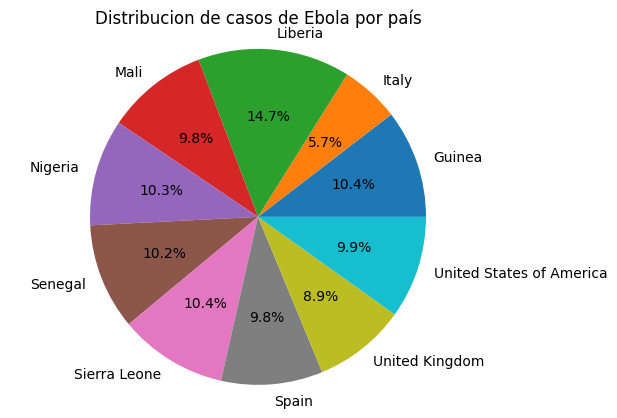

In [ ]:
#Grafica de pastel
#autopct, ajusta los porcetajes de manera automatica
plt.pie(conteo["conteo"], labels=conteo["Country"], autopct='%0.1f%%')
plt.title("Distribucion de casos de Ebola por país")
plt.axis("equal")#Para mejor despliegue de la grafica
plt.savefig("ebola_pie.png", dpi=300, format="png")
plt.show()

In [ ]:
Guinea = df[df["Country"] == "Guinea"]
Guinea.head()

,Country,Date,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
0,Guinea,2014-08-29,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
4,Guinea,2014-09-05,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
12,Guinea,2014-09-08,664,400.0,398.4,265.6,119.52,79.68,239.04,159.36,39.84,26.56
15,Guinea,2014-09-12,678,403.0,406.8,271.2,122.04,81.36,244.08,162.72,40.68,27.12
22,Guinea,2014-09-16,743,429.0,445.8,297.2,133.74,89.16,267.48,178.32,44.58,29.72


In [ ]:
mean_value=Guinea["No. of confirmed deaths"].mean()
Guinea.fillna(mean_value,inplace=True)
Guinea.isnull().sum()
print(mean_value)

1794.5953307392997


<ipython-input-39-f3446b1f0a59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Guinea.fillna(mean_value,inplace=True)


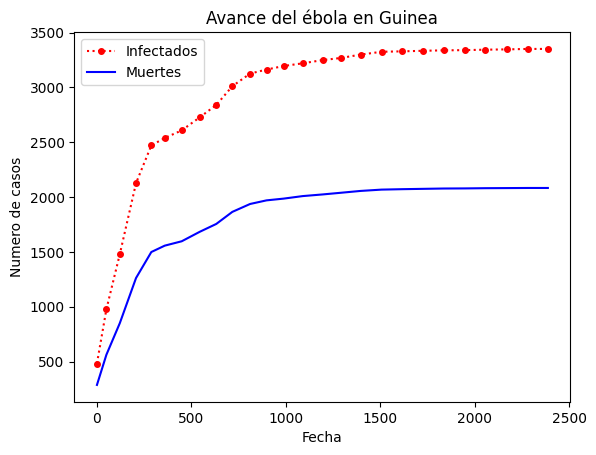

In [ ]:
Guinea_infectados=Guinea["No. of confirmed cases"][0:-1:10]
Guinea_muertes=Guinea["No. of confirmed deaths"][0:-1:10]
fechas=Guinea.index[0:-1:10]
plt.plot(fechas, Guinea_infectados, "o:r", ms=4, label="Infectados")
plt.plot(fechas, Guinea_muertes, "-b", ms=4, label="Muertes")
plt.title("Avance del ébola en Guinea")
plt.xlabel("Fecha")
plt.ylabel("Numero de casos")
plt.legend()
plt.savefig("ebola_guinea.png", dpi=300, format="png")
plt.show()

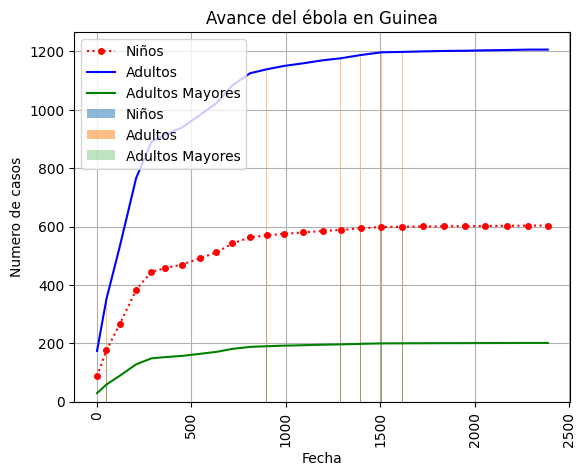

In [ ]:
Guinea_boys=Guinea["Boys"][0:-1:10]
Guinea_AM=Guinea["Adult Male"][0:-1:10]
Guinea_AM_m=Guinea["Old Male"][0:-1:10]
fechas=Guinea.index[0:-1:10]

plt.plot(fechas,Guinea_boys, "o:r", ms=4, label="Niños")
plt.bar(fechas, Guinea_boys, alpha=0.5, label="Niños")
plt.plot(fechas, Guinea_AM, "-b", ms=4, label="Adultos")
plt.bar(fechas, Guinea_AM, alpha=0.5, label="Adultos")
plt.plot(fechas, Guinea_AM_m, "-g", ms=4, label="Adultos Mayores")
plt.bar(fechas, Guinea_AM_m, alpha=0.3, label="Adultos Mayores")
plt.title("Avance del ébola en hombres en Guinea")
plt.xlabel("Fecha")
plt.ylabel("Numero de casos")
plt.grid()
plt.xticks(rotation=90, fontsize=10)
plt.legend()

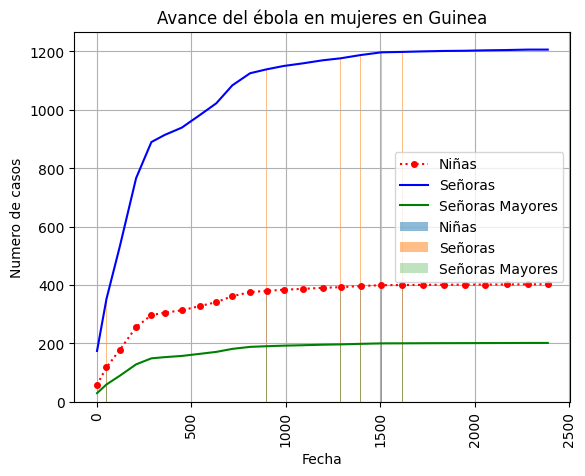

In [ ]:
Guinea_girls=Guinea["Girls"][0:-1:10]
Guinea_AM=Guinea["Adult Male"][0:-1:10]
Guinea_AM_m=Guinea["Old Male"][0:-1:10]
fechas=Guinea.index[0:-1:10]

plt.plot(fechas,Guinea_girls, "o:r", ms=4, label="Niñas")
plt.bar(fechas, Guinea_girls, alpha=0.5, label="Niñas")
plt.plot(fechas, Guinea_AM, "-b", ms=4, label="Señoras")
plt.bar(fechas, Guinea_AM, alpha=0.5, label="Señoras")
plt.plot(fechas, Guinea_AM_m, "-g", ms=4, label="Señoras Mayores")
plt.bar(fechas, Guinea_AM_m, alpha=0.3, label="Señoras Mayores")
plt.title("Avance del ébola en mujeres en Guinea")
plt.xlabel("Fecha")
plt.ylabel("Numero de casos")
plt.grid()
plt.xticks(rotation=90, fontsize=10)
plt.legend()